# Bra-ket notasjon

In [28]:
import numpy as np
# bra er konjugat-transponering av en ket og omvendt
zero_ket = np.array([[1],[0]])
one_ket = np.array([[0],[1]])
print(f'Ket: {zero_ket[0]}\n     {zero_ket[1]}')
print('- zero_ket.T.conj()')
print(f'Bra: {zero_ket[0]}{zero_ket[1]}')

Ket: [1]
     [0]
- zero_ket.T.conj()
Bra: [1][0]


In [20]:
# Hvert eneste kvantetilstand ganget med seg selv er en
print(zero_ket.T.conj() @ zero_ket)
# Vektorer 90 grader på hverandre er alltid 0
print(zero_ket.T.conj() @ one_ket)
# Selv om det ser ut som om one_ket og zero_ket ser ut som de er på samme akse på bloch_sphere, er de ikke det.

[[1]]
[[0]]


In [27]:
zero_ket @ zero_ket.T.conj()

array([[1, 0],
       [0, 0]])

In [30]:
'''bra @ ket -> skalar
    bra = ket -> 1
    bra normal på ket -> 0
ket @ bra -> matrise
matrise @ ket = skalar @ ket'''

'bra @ ket -> skalar\n    bra = ket -> 1\n    bra normal på ket -> 0\nket @ bra -> matrise'

# Målinger

In [31]:
w = np.array([[1], [0]])/np.sqrt(2)
n_0 = zero_ket @ zero_ket.T.conj()
w.T.conj() @ n_0 @ w

array([[0.5]])

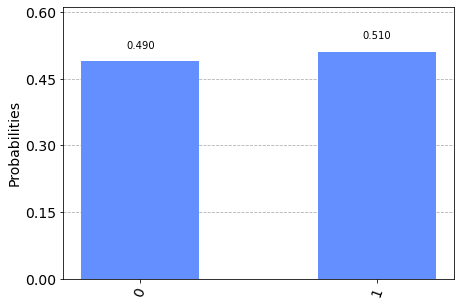

In [33]:
from qiskit import QuantumCircuit
from qiskit import execute, Aer
from qiskit.tools.visualization import plot_histogram

backend = Aer.get_backend('qasm_simulator')
circuit = QuantumCircuit(1,1)
circuit.h(0)
circuit.measure(0,0)
job = execute(circuit, backend, shots=100)
plot_histogram(job.result().get_counts(circuit))

In [42]:
w = np.array([[np.sqrt(2)/2], [np.sqrt(2)/2]])
n_0 = zero_ket @ zero_ket.T.conj()
probability_0 = w.T.conj() @ n_0 @ w
n_0 @ w/np.sqrt(probability_0)

array([[1.],
       [0.]])

In [55]:
backend = Aer.get_backend('qasm_simulator')
circuit = QuantumCircuit(1,2)
circuit.h(0)
circuit.measure(0,0)
circuit.measure(0,1)
job = execute(circuit, backend, shots=1000)
job.result().get_counts(circuit)

{'00': 513, '11': 487}

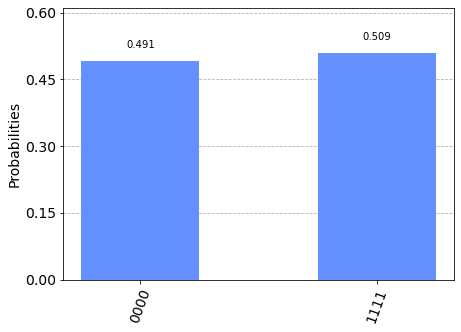

In [68]:
circuit = QuantumCircuit(2, 4)
circuit.h(0)
circuit.cx(0,1)
circuit.measure([0,0],[0,1])
circuit.measure([1,1],[2,3])
job = execute(circuit, backend, shots=1000)
plot_histogram(job.result().get_counts(circuit))

# Blandede tilstander

In [79]:
w = np.array([[1], [1]])/np.sqrt(2)
p = w @ w.T.conj()
n_0 = zero_ket @ zero_ket.T.conj()
np.trace(n_0 @ p)

0.4999999999999999

In [81]:
probability_0 = np.trace(n_0 @ p)
n_0 @ p @ n_0/probability_0

array([[1., 0.],
       [0., 0.]])

In [82]:
zero_ket = np.array([[1], [0]])
one_ket = np.array([[0], [1]])
w = (zero_ket + one_ket)/np.sqrt(2)
print("Density matrix of the equal superposition")
print(w @ w.T.conj())
print("Density matrix of the equally mixed state of |0><0| and |1><1|")
print((zero_ket @ zero_ket.T.conj()+one_ket @ one_ket.T.conj())/2)

Density matrix of the equal superposition
[[0.5 0.5]
 [0.5 0.5]]
Density matrix of the equally mixed state of |0><0| and |1><1|
[[0.5 0. ]
 [0.  0.5]]
